In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# We will use these later, best to import them up here.
import numpy as np
import sklearn
import pandas as pd

In [4]:
# Make sure to import pandas as pd somewhere in your file (we did this at the top)

# We can tell Pandas to read our CSV data file by giving it a file path.
training_data = pd.read_csv('./as1-bank.csv')

In [5]:
training_data

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,144,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,73,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,140,1,143,3,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1,no,1475,yes,no,0,1166,3,530,12,2,no
7838,53,1,2,no,583,no,no,0,226,1,184,4,1,yes
7839,73,1,1,no,2850,no,no,0,300,1,40,8,0,yes
7840,72,1,1,no,5715,no,no,0,1127,5,184,3,1,yes


In [6]:
# Data needs to be numeric for us to work with it.
# We can use dataframe.replace to replace values with others.
# In this case, we'll replace "yes" with 1
#
# inplace=True means we don't need to assign it to a new variable.
training_data.replace("yes", 1, inplace=True)
training_data.replace("no", 0, inplace=True)

In [7]:
training_data

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,0,882,0,0,1,39,1,151,3,0,0
1,42,0,1,0,-247,1,1,1,519,1,166,1,2,1
2,33,1,1,0,3444,1,0,1,144,1,91,4,0,1
3,36,1,2,0,2415,1,0,1,73,1,86,4,2,0
4,36,1,2,0,0,1,0,1,140,1,143,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1,0,1475,1,0,0,1166,3,530,12,2,0
7838,53,1,2,0,583,0,0,0,226,1,184,4,1,1
7839,73,1,1,0,2850,0,0,0,300,1,40,8,0,1
7840,72,1,1,0,5715,0,0,0,1127,5,184,3,1,1


In [8]:
# Grab the y column, and then remove it from the main Dataframe.
training_y = training_data.pop('y')

#Remove 'duration' column from the data
Remove_training_x = training_data.pop('duration') 

# The rest are the inputs
training_x = training_data
#training_x = training_data.drop('duration',inplace=True, axis=1)

In [9]:
training_x
#training_data

,age,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome
0,33,1,2,0,882,0,0,1,1,151,3,0
1,42,0,1,0,-247,1,1,1,1,166,1,2
2,33,1,1,0,3444,1,0,1,1,91,4,0
3,36,1,2,0,2415,1,0,1,1,86,4,2
4,36,1,2,0,0,1,0,1,1,143,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1,0,1475,1,0,0,3,530,12,2
7838,53,1,2,0,583,0,0,0,1,184,4,1
7839,73,1,1,0,2850,0,0,0,1,40,8,0
7840,72,1,1,0,5715,0,0,0,5,184,3,1


In [10]:
training_y

0       0
1       1
2       1
3       0
4       1
       ..
7837    0
7838    1
7839    1
7840    1
7841    0
Name: y, Length: 7842, dtype: int64

In [11]:
#Convert the dataframe ready for input into neural network 
arr_train_x = training_x.to_numpy()
arr_train_y = training_y.to_numpy()

In [12]:
print(arr_train_x)

[[ 33   1   2 ... 151   3   0]
 [ 42   0   1 ... 166   1   2]
 [ 33   1   1 ...  91   4   0]
 ...
 [ 73   1   1 ...  40   8   0]
 [ 72   1   1 ... 184   3   1]
 [ 37   1   1 ... 188  11   2]]


In [13]:
print(arr_train_y)

[0 1 1 ... 1 1 0]


In [14]:
#Separe training and test data
#It can not be evaluated purely on the training data.
from sklearn.model_selection import train_test_split

# Train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    arr_train_x, arr_train_y, test_size=0.30, random_state=42, shuffle=True)
    #arr_train_x, arr_train_y, test_size=0.3, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(5489, 12)
(2353, 12)


In [15]:
#Preparing the data
from sklearn.preprocessing import MinMaxScaler

#create the object
minmax_scale = MinMaxScaler ()

#fit on the train data set
minmax_scale.fit((X_train))

#transfor the data set columns 
X_train_minmax =minmax_scale.transform(X_train)
print(X_train_minmax)


[[0.37142857 0.5        0.5        ... 0.11494253 0.00364964 0.        ]
 [0.31428571 0.5        0.         ... 0.39425287 0.         0.        ]
 [0.24285714 0.         0.5        ... 0.34482759 0.00729927 0.        ]
 ...
 [0.21428571 1.         1.         ... 0.10689655 0.02554745 0.        ]
 [1.         0.5        0.5        ... 0.3137931  0.         0.        ]
 [0.57142857 1.         0.         ... 0.26781609 0.00364964 0.        ]]


In [16]:
#Note that the quantities used for normalizing the test data are computed using the
#training data. You should never use in your workflow any quantity computed on the
#test data, even for something as simple as data normalization.

X_test_minmax = minmax_scale.transform(X_test)
print(X_test_minmax)


[[0.34285714 0.5        1.         ... 0.09885057 0.01094891 0.        ]
 [0.32857143 0.5        0.5        ... 0.36781609 0.         0.        ]
 [0.15714286 0.5        1.         ... 0.34597701 0.         0.        ]
 ...
 [0.4        0.5        0.         ... 0.34482759 0.         0.        ]
 [0.18571429 0.         0.5        ... 0.41264368 0.00364964 0.        ]
 [0.52857143 0.5        0.5        ... 0.29655172 0.01094891 0.        ]]


In [17]:
#Ready to building your network
X_train_ready =X_train_minmax
X_test_ready = X_test_minmax

Y_train_ready = Y_train
Y_test_ready = Y_test

In [18]:
#THIRD MODEL


In [19]:
#Define our model (Drop out)

model3 = keras.Sequential()

model3.add(layers.InputLayer(input_shape=(12))) # 12 Columns of input

model3.add(layers.Dense(64, activation="relu"))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(64, activation="relu"))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(64, activation="relu"))
model3.add(layers.Dropout(0.2))




model3.add(layers.Dense(1, activation="sigmoid")) # 0->1 floating

model3.summary()

# Compile the model.
model3.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

#Fitting our model
model3_training_history = model3.fit(
    X_train_ready,
    Y_train_ready,
    #batch_size = 8,
    epochs = 120,
    validation_data = (X_test_ready, Y_test_ready)
)








Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

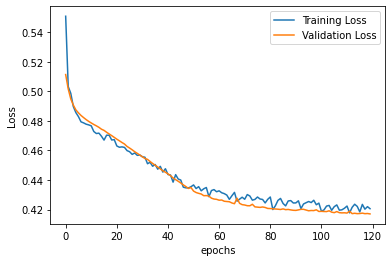

In [20]:
#Display our data
import matplotlib.pyplot as plt

# If we want to be fancy, we can set a theme by uncommenting the below line.
#plt.style.use('ggplot')


loss = model3_training_history.history['loss']
val_loss = model3_training_history.history['val_loss']

# Training loss, and Validation loss. Providing labels is useful for our legend later.
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")

# X and Y axes labels.
plt.ylabel('Loss')
plt.xlabel('epochs')



# Display a legend.
plt.legend()


74/74 [==============================] - 0s 441us/step - loss: 0.4170 - accuracy: 0.8219
0.4170084595680237 0.8219294548034668
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[1684  127]
 [ 292  250]]
TP: 250
FP: 127
TN: 1684
FN: 292
Accuracy: 0.8219294517637059
Specificity: 0.9298729983434566
Sensitivity: 0.4612546125461255
Precision: 0.6631299734748011
F1-Score: 0.5440696409140371


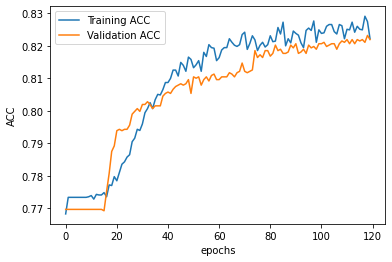

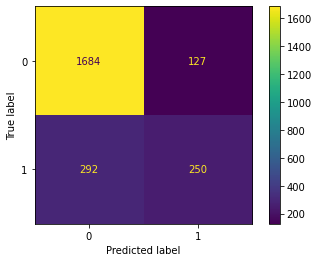

In [21]:
# Get our accuracy and loss metrics (these should be lists of numbers)
acc = model3_training_history.history['accuracy']
val_acc = model3_training_history.history['val_accuracy']


plt.plot(acc, label="Training ACC")
plt.plot(val_acc, label="Validation ACC")

# X and Y axes labels.
plt.ylabel('ACC')
plt.xlabel('epochs')



# Display a legend.
plt.legend()

#EVALUATING 
#network estimates
test_loss, test_acc = model3.evaluate(X_test_ready, Y_test_ready)
print(test_loss, test_acc)

y_pred = (model3.predict(X_test_ready)>0.5).astype ("int32")
print(y_pred)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(Y_test, np.round(y_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(Y_test_ready, np.round(y_pred) ).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test_ready, np.round(y_pred))

acc = (tp + tn) / (tp+fp+tn+fn)
spec = tn / (tn+fp)
sens = tp / (tp+fn)
prec = tp / (tp+fp)

f1 = 2 * ((prec * sens)/(prec + sens))

print(f"Accuracy: {acc}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")
print(f"Precision: {prec}")
print(f"F1-Score: {f1}")


In [22]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print("Using SKLEARN.")

print(f"Accuracy: {accuracy_score(Y_test_ready, y_pred)}")
print(f"No utility for specificity alone")
print(f"Sensitivity: {recall_score(Y_test_ready, y_pred)}")
print(f"Precision: {precision_score(Y_test_ready, y_pred)}")
print(f"F1-Score: {f1_score(Y_test_ready, y_pred)}")

Using SKLEARN.
Accuracy: 0.8219294517637059
No utility for specificity alone
Sensitivity: 0.4612546125461255
Precision: 0.6631299734748011
F1-Score: 0.5440696409140371


In [23]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_ready, y_pred))
print(Y_test_ready)
print(y_pred)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1811
           1       0.66      0.46      0.54       542

    accuracy                           0.82      2353
   macro avg       0.76      0.70      0.72      2353
weighted avg       0.81      0.82      0.81      2353

[1 0 0 ... 0 0 0]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
